## Introduction

Let's start by loading *pandas*. To make sure that the data was successfully loaded, we will use the .head() function to visualize the headers and the first five observations.

Don't worry about understanding what the different columns are telling us yet, because that's exactly what we will be doing in the following section.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("garments_worker_productivity.csv")
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


## Dataset Exploration

In this section we will perform an Exploratory Data Analysis (EDA) on the dataset.

We won't change anything yet, as it is important to first understand what the dataset is telling us, along with its structure and general characteristics.

Let's start by getting the dataset's *shape*, where the first value indicates the number of observations and the second one the number of columns.

In [3]:
df.shape

(1197, 15)

Now let's explore the column numbers, how many non-null observations each one has, and their respective data types (*dtypes*).

In *pandas*, remember that an "object" dtype means the observations of that specific column are treated as strings/text.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

We will now get general statistics about the numerical columns.

Remember that *std* stands for Standard Deviation, and the percentages represent percentiles. *min* and *max* indicate the maximum values on every column, so these are particularly useful to detect outliers.

In [5]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


We can see, for instance, that the *actual_productivity* column actually surpasses the limit of 1 that was indicated on the dataset description!

Also, the maximum *wip* (Work in Progress) value is 23122. This means there is an observation where the number of unfinished items for products is 23122!

In addition, we can conclude that time management in this factory is pretty efficient, since we barely have idle time and idle men. It appears there was either a single or a reduced number of incidents where production was stopped.

There are a lot of other interesting facts that you can discover by carefully examining the describe() table, and we encourage you to keep looking for them! It's always important to understand what the dataset is telling us to avoid confusions during subsequent steps in the process.

- - -

In the next subsections, we will explore every column individually. 

One important note: since exploration is an open-ended activity, consider all the following pieces of code as guidance. They aren't mandatory, and you're always free to write the ones you prefer. But still, we strongly recommend to use them, as we believe that they allow to not only discover important insights, but also to ensure that the data is coherent in the different columns.

### "date" column

We can also use the head() function on single columns to see the first five values...

In [6]:
df["date"].head()

0    1/1/2015
1    1/1/2015
2    1/1/2015
3    1/1/2015
4    1/1/2015
Name: date, dtype: object

... and tail() to see the last five ones.

In [7]:
df["date"].tail()

1192    3/11/2015
1193    3/11/2015
1194    3/11/2015
1195    3/11/2015
1196    3/11/2015
Name: date, dtype: object

Also, it's useful to select a number of random observations to get a general idea of the data in the column. In this case, we will choose 20, but you can use any number you prefer.

One important clarification: although the sample() method returns random observations, in this case, to ensure reproducibility, we've set up the "random_state" parameter to always get the same observations, therefore when making your own explorations make sure to remove it.

In [8]:
df["date"].sample(20, random_state = 14)

959     2/26/2015
464     1/27/2015
672      2/8/2015
321     1/19/2015
282     1/17/2015
307     1/18/2015
609      2/4/2015
1123     3/8/2015
877     2/22/2015
950     2/26/2015
692     2/10/2015
51       1/4/2015
505     1/29/2015
554      2/1/2015
801     2/16/2015
1017     3/2/2015
340     1/20/2015
732     2/12/2015
616      2/4/2015
806     2/17/2015
Name: date, dtype: object

### "quarter" column

This column's title is pretty peculiar, in the sense that when we say "quarter", we are usually referring to part of a year. But here, it's actually referring to part of a month.

This teaches us a valuable lesson: never make assumptions about the data based purely on the title of a column! It's always a good idea to keep a dataset's description close at hand to refresh our memory if we need to.

Let's use the value_counts() method to see how many observations per week we have:

In [9]:
df["quarter"].value_counts()

Quarter1    360
Quarter2    335
Quarter4    248
Quarter3    210
Quarter5     44
Name: quarter, dtype: int64

Interestingly, we see there are 44 observations with a "Quarter 5" classification. Let's specifically explore them by using a mask on our dataset:

In [10]:
df[df["quarter"] == "Quarter5"]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
498,1/29/2015,Quarter5,sweing,Thursday,2,0.80,22.52,1416.0,6840,113,0.0,0,0,57.0,1.000230
499,1/29/2015,Quarter5,finishing,Thursday,4,0.80,4.30,NaN,1200,0,0.0,0,0,10.0,0.989000
500,1/29/2015,Quarter5,sweing,Thursday,3,0.80,22.52,1287.0,6840,100,0.0,0,0,57.0,0.950186
501,1/29/2015,Quarter5,sweing,Thursday,4,0.80,22.52,1444.0,6900,88,0.0,0,0,57.5,0.900800
502,1/29/2015,Quarter5,sweing,Thursday,10,0.80,22.52,1088.0,6720,88,0.0,0,0,56.0,0.900130
503,1/29/2015,Quarter5,finishing,Thursday,6,0.50,2.90,NaN,1200,0,0.0,0,0,10.0,0.899000
504,1/29/2015,Quarter5,finishing,Thursday,8,0.65,4.15,NaN,960,0,0.0,0,0,8.0,0.877552
505,1/29/2015,Quarter5,finishing,Thursday,11,0.60,2.90,NaN,960,0,0.0,0,0,8.0,0.864583
506,1/29/2015,Quarter5,finishing,Thursday,10,0.80,3.94,NaN,1200,0,0.0,0,0,10.0,0.856950
507,1/29/2015,Quarter5,finishing,Thursday,1,0.75,3.94,NaN,1200,0,0.0,0,0,10.0,0.853667


If we check the "dates" column, we can see that "Quarter 5" always comprises observations where the date is either 29th or 31st.

### "department" column

In [11]:
df["department"].value_counts()

sweing        691
finishing     257
finishing     249
Name: department, dtype: int64

We can see there is a problem with this column: we have two distinct "finishing" values. Cases like this one usually happen when there is a "hidden" space in the content of the observations. There is a practical way to explore this, by getting the unique() values on a single column:

In [12]:
df["department"].unique()

array(['sweing', 'finishing ', 'finishing'], dtype=object)

Indeed, we see that we have 'finishing ' (with a trailing space) and 'finishing' (without a space), so we will need to fix this problem later, during the Data Cleaning step.

### "day" column

In [13]:
df["day"].value_counts()

Wednesday    208
Sunday       203
Tuesday      201
Thursday     199
Monday       199
Saturday     187
Name: day, dtype: int64

Interestingly, there are no Friday observations. This doesn't necessarily mean that we have missing information; for instance, it could simply mean that the factory is closed on Fridays. 

But definitely it's excellent that we're now aware of this fact, and you can always write down these kind of discoveries to always keep them in mind for future steps.

### "team" column

Since it's possible to concatenate methods or functions, for this column we will organize the value counts by sorting the team numbers in ascending order.

Therefore, the left column of numbers represents the team number, and the right column the number of observations associated with it.

In [14]:
df["team"].value_counts().sort_index()

1     105
2     109
3      95
4     105
5      93
6      94
7      96
8     109
9     104
10    100
11     88
12     99
Name: team, dtype: int64

### "targeted_productivity" & "actual_productivity" columns

A good approach in this case could be to check these two columns together.

For instance, let's check the observations where the productivity was higher than expected.

In [15]:
df[df["actual_productivity"] > df["targeted_productivity"]]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,3/11/2015,Quarter2,sweing,Wednesday,4,0.75,26.82,1054.0,7080,45,0.0,0,0,59.0,0.750051
1188,3/11/2015,Quarter2,sweing,Wednesday,5,0.70,26.82,992.0,6960,30,0.0,0,1,58.0,0.700557
1189,3/11/2015,Quarter2,sweing,Wednesday,8,0.70,30.48,914.0,6840,30,0.0,0,1,57.0,0.700505
1190,3/11/2015,Quarter2,sweing,Wednesday,6,0.70,23.41,1128.0,4560,40,0.0,0,1,38.0,0.700246


We can see that in ~75% of all observations, workers were productive and managed to surpass the target productivity threshold.

And now, what about the observations where the actual productivity was exactly equal to the target productivity?

In [16]:
df[df["targeted_productivity"] == df["actual_productivity"]]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
163,1/10/2015,Quarter2,sweing,Saturday,10,0.8,28.08,1082.0,10530,63,0.0,0,0,58.5,0.8
182,1/11/2015,Quarter2,sweing,Sunday,2,0.8,28.08,805.0,10530,63,0.0,0,0,58.5,0.8
183,1/11/2015,Quarter2,sweing,Sunday,10,0.8,28.08,762.0,10530,38,0.0,0,0,58.5,0.8
207,1/12/2015,Quarter2,sweing,Monday,2,0.8,28.08,737.0,10530,63,0.0,0,0,58.5,0.8
229,1/13/2015,Quarter2,sweing,Tuesday,2,0.8,28.08,723.0,10530,50,0.0,0,0,58.5,0.8
855,2/19/2015,Quarter3,sweing,Thursday,8,0.7,29.40,1116.0,6240,0,0.0,0,2,57.0,0.7


Only six observations. As expected, they were going to be very few, as it's hard to find an exact match between the targeted productivity values and the actual ones.

And finally, we should check the observations where the actual productivity failed to meet the target.

In [17]:
df[df["targeted_productivity"] > df["actual_productivity"]]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
11,1/1/2015,Quarter1,sweing,Thursday,10,0.75,19.31,578.0,6480,45,0.0,0,0,54.0,0.712205
12,1/1/2015,Quarter1,sweing,Thursday,5,0.80,11.41,668.0,3660,50,0.0,0,0,30.5,0.707046
14,1/1/2015,Quarter1,finishing,Thursday,8,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.676667
15,1/1/2015,Quarter1,finishing,Thursday,4,0.75,3.94,NaN,2160,0,0.0,0,0,18.0,0.593056
16,1/1/2015,Quarter1,finishing,Thursday,7,0.80,2.90,NaN,960,0,0.0,0,0,8.0,0.540729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


Although far fewer than the number of productive days, there are still a lot of observations where productivity targets weren't met. Around ~25% of the total number of observations, actually.

And now, we should focus exclusively on the "actual_productivity" column to check all the observations where the range was higher than 1, despite the description indicating that 1 was the maximum possible value.

In [18]:
df[df["actual_productivity"] > 1]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
337,1/20/2015,Quarter3,finishing,Tuesday,5,0.70,4.15,NaN,1440,0,0.0,0,0,8.0,1.033570
437,1/26/2015,Quarter4,finishing,Monday,3,0.75,3.94,NaN,1800,0,0.0,0,0,10.0,1.059621
456,1/27/2015,Quarter4,sweing,Tuesday,2,0.75,22.52,1635.0,6840,119,0.0,0,0,57.0,1.000230
457,1/27/2015,Quarter4,sweing,Tuesday,3,0.75,22.52,1299.0,6840,119,0.0,0,0,57.0,1.000230
477,1/28/2015,Quarter4,sweing,Wednesday,2,0.80,22.52,1559.0,6840,90,0.0,0,0,57.0,1.000230
478,1/28/2015,Quarter4,sweing,Wednesday,3,0.80,22.52,1350.0,6840,113,0.0,0,0,57.0,1.000230
498,1/29/2015,Quarter5,sweing,Thursday,2,0.80,22.52,1416.0,6840,113,0.0,0,0,57.0,1.000230
518,1/31/2015,Quarter5,sweing,Saturday,3,0.80,22.52,1136.0,6960,113,0.0,0,0,58.0,1.000457
519,1/31/2015,Quarter5,sweing,Saturday,2,0.80,22.52,1397.0,6840,113,0.0,0,0,57.0,1.000230
542,2/1/2015,Quarter1,finishing,Sunday,8,0.65,4.15,NaN,960,0,0.0,0,0,8.0,1.011562


### "wip" column

This column records the number of unfinished items for products.

It's also the only column with missing observations, so if we want to check the observations that do contain information, we can filter them with the notnull() method:

In [19]:
df[df["wip"].notnull()]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
5,1/1/2015,Quarter1,sweing,Thursday,7,0.80,25.90,984.0,6720,38,0.0,0,0,56.0,0.800125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,3/11/2015,Quarter2,sweing,Wednesday,4,0.75,26.82,1054.0,7080,45,0.0,0,0,59.0,0.750051
1188,3/11/2015,Quarter2,sweing,Wednesday,5,0.70,26.82,992.0,6960,30,0.0,0,1,58.0,0.700557
1189,3/11/2015,Quarter2,sweing,Wednesday,8,0.70,30.48,914.0,6840,30,0.0,0,1,57.0,0.700505
1190,3/11/2015,Quarter2,sweing,Wednesday,6,0.70,23.41,1128.0,4560,40,0.0,0,1,38.0,0.700246


Alternatively: if we want to see the null/missing values, we would use the isnull() method instead.

### "over_time" column

This column records the amount of overtime by each team in minutes. It has a wide range of values, as we already confirmed with the describe() method.

You might notice that we will be invoking the describe() method more frequently. We do this so that you don't have to scroll up all the time to see the original table at the beginning of this Notebook.

In [20]:
df["over_time"].describe()

count     1197.000000
mean      4567.460317
std       3348.823563
min          0.000000
25%       1440.000000
50%       3960.000000
75%       6960.000000
max      25920.000000
Name: over_time, dtype: float64

Considering these results, it might be interesting to check the observations where the overtime surpasses a certain threshold. As always, you're free to set the number you consider most convenient, but as an example, here we will use the value of the 50% percentile:

In [21]:
df[df["over_time"] > 3960]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
5,1/1/2015,Quarter1,sweing,Thursday,7,0.80,25.90,984.0,6720,38,0.0,0,0,56.0,0.800125
7,1/1/2015,Quarter1,sweing,Thursday,3,0.75,28.08,795.0,6900,45,0.0,0,0,57.5,0.753683
8,1/1/2015,Quarter1,sweing,Thursday,2,0.75,19.87,733.0,6000,34,0.0,0,0,55.0,0.753098
9,1/1/2015,Quarter1,sweing,Thursday,1,0.75,28.08,681.0,6900,45,0.0,0,0,57.5,0.750428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1187,3/11/2015,Quarter2,sweing,Wednesday,4,0.75,26.82,1054.0,7080,45,0.0,0,0,59.0,0.750051
1188,3/11/2015,Quarter2,sweing,Wednesday,5,0.70,26.82,992.0,6960,30,0.0,0,1,58.0,0.700557
1189,3/11/2015,Quarter2,sweing,Wednesday,8,0.70,30.48,914.0,6840,30,0.0,0,1,57.0,0.700505
1190,3/11/2015,Quarter2,sweing,Wednesday,6,0.70,23.41,1128.0,4560,40,0.0,0,1,38.0,0.700246


As expected, almost half of the observations in the dataset feature a significant overtime among teams.

Let's explore the columns without overtime.

In [22]:
df[df["over_time"] == 0]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
684,2/9/2015,Quarter2,sweing,Monday,11,0.75,10.05,103.0,0,45,0.0,0,0,54.0,0.750648
694,2/10/2015,Quarter2,sweing,Tuesday,10,0.80,22.52,1268.0,0,88,0.0,0,0,56.0,0.900632
695,2/10/2015,Quarter2,sweing,Tuesday,1,0.80,22.52,1546.0,0,88,0.0,0,0,57.0,0.900471
696,2/10/2015,Quarter2,sweing,Tuesday,3,0.80,22.52,813.0,0,88,0.0,0,0,57.0,0.900471
697,2/10/2015,Quarter2,sweing,Tuesday,2,0.80,22.52,1512.0,0,88,0.0,0,0,57.0,0.899984
713,2/11/2015,Quarter2,sweing,Wednesday,2,0.80,22.52,1557.0,0,90,0.0,0,0,57.5,1.000345
714,2/11/2015,Quarter2,sweing,Wednesday,1,0.80,22.52,1498.0,0,113,0.0,0,0,57.0,1.000066
718,2/11/2015,Quarter2,sweing,Wednesday,10,0.80,22.52,598.0,0,75,0.0,0,0,56.0,0.850365
730,2/12/2015,Quarter2,sweing,Thursday,1,0.80,22.52,1397.0,0,138,0.0,0,0,57.0,1.100484
732,2/12/2015,Quarter2,sweing,Thursday,2,0.80,22.52,1327.0,0,113,0.0,0,0,57.5,1.000345


In [23]:
len(df[df["over_time"] == 0])

31

We have only 31 total observations without overtime!

What happens if we contrast the "over_time" column with the ones related to productivity. For instance, how many observations we have where the productivity standards were met without overtime?

In [24]:
df[(df["over_time"] == 0) & (df["actual_productivity"] > df["targeted_productivity"])]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
684,2/9/2015,Quarter2,sweing,Monday,11,0.75,10.05,103.0,0,45,0.0,0,0,54.0,0.750648
694,2/10/2015,Quarter2,sweing,Tuesday,10,0.80,22.52,1268.0,0,88,0.0,0,0,56.0,0.900632
695,2/10/2015,Quarter2,sweing,Tuesday,1,0.80,22.52,1546.0,0,88,0.0,0,0,57.0,0.900471
696,2/10/2015,Quarter2,sweing,Tuesday,3,0.80,22.52,813.0,0,88,0.0,0,0,57.0,0.900471
697,2/10/2015,Quarter2,sweing,Tuesday,2,0.80,22.52,1512.0,0,88,0.0,0,0,57.0,0.899984
713,2/11/2015,Quarter2,sweing,Wednesday,2,0.80,22.52,1557.0,0,90,0.0,0,0,57.5,1.000345
714,2/11/2015,Quarter2,sweing,Wednesday,1,0.80,22.52,1498.0,0,113,0.0,0,0,57.0,1.000066
718,2/11/2015,Quarter2,sweing,Wednesday,10,0.80,22.52,598.0,0,75,0.0,0,0,56.0,0.850365
730,2/12/2015,Quarter2,sweing,Thursday,1,0.80,22.52,1397.0,0,138,0.0,0,0,57.0,1.100484
732,2/12/2015,Quarter2,sweing,Thursday,2,0.80,22.52,1327.0,0,113,0.0,0,0,57.5,1.000345


It's clear now that it's a rare event to meet targets without putting in overtime!

### "incentive" column

This column is about the financial incentives that motivate a particular course of action. The information we got by using the describe() method was the following:

In [25]:
df["incentive"].describe()

count    1197.000000
mean       38.210526
std       160.182643
min         0.000000
25%         0.000000
50%         0.000000
75%        50.000000
max      3600.000000
Name: incentive, dtype: float64

We can see that workers barely have incentives. How many observations don't feature any kind of incentive?

In [26]:
len(df[df["incentive"] == 0])

604

That's more than half of the entire dataset!

And since incentives only appear for the 75% percentile (which isn't the same to say that they appear exactly on this percentile, by the way), let's see how many observations include incentives greater than 50:

In [27]:
df[df["incentive"] > 50]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
27,1/3/2015,Quarter1,sweing,Saturday,12,0.80,26.16,844.0,7080,63,0.0,0,0,59.0,0.800319
32,1/3/2015,Quarter1,sweing,Saturday,10,0.75,19.31,610.0,6480,56,0.0,0,0,54.0,0.787300
45,1/4/2015,Quarter1,sweing,Sunday,9,0.80,26.16,1278.0,7080,60,0.0,0,0,59.0,0.850569
46,1/4/2015,Quarter1,sweing,Sunday,7,0.80,25.90,1227.0,7020,60,0.0,0,0,56.5,0.850436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1156,3/10/2015,Quarter2,sweing,Tuesday,4,0.75,26.82,1104.0,5880,65,0.0,0,0,59.0,0.850084
1158,3/10/2015,Quarter2,sweing,Tuesday,12,0.80,15.26,1069.0,4080,63,0.0,0,0,34.0,0.800402
1159,3/10/2015,Quarter2,sweing,Tuesday,3,0.80,30.10,756.0,6960,63,0.0,0,1,58.0,0.800072
1178,3/11/2015,Quarter2,sweing,Wednesday,12,0.80,15.26,470.0,4080,63,0.0,0,0,34.0,0.800402


The number is pretty small, only a third with respect to the number of observations without incentives. What happens if we only include observations with an incentive higher than 100?

In [28]:
df[df["incentive"] > 100]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
456,1/27/2015,Quarter4,sweing,Tuesday,2,0.75,22.52,1635.0,6840,119,0.0,0,0,57.0,1.000230
457,1/27/2015,Quarter4,sweing,Tuesday,3,0.75,22.52,1299.0,6840,119,0.0,0,0,57.0,1.000230
478,1/28/2015,Quarter4,sweing,Wednesday,3,0.80,22.52,1350.0,6840,113,0.0,0,0,57.0,1.000230
498,1/29/2015,Quarter5,sweing,Thursday,2,0.80,22.52,1416.0,6840,113,0.0,0,0,57.0,1.000230
518,1/31/2015,Quarter5,sweing,Saturday,3,0.80,22.52,1136.0,6960,113,0.0,0,0,58.0,1.000457
519,1/31/2015,Quarter5,sweing,Saturday,2,0.80,22.52,1397.0,6840,113,0.0,0,0,57.0,1.000230
543,2/1/2015,Quarter1,sweing,Sunday,2,0.80,22.52,1396.0,6900,113,0.0,0,0,57.5,1.000671
544,2/1/2015,Quarter1,sweing,Sunday,1,0.80,22.94,1582.0,3060,113,0.0,0,0,58.5,1.000402
561,2/2/2015,Quarter1,sweing,Monday,1,0.80,22.94,16882.0,7020,113,0.0,0,0,58.5,1.000602
581,2/3/2015,Quarter1,sweing,Tuesday,1,0.80,22.52,1500.0,6900,113,0.0,0,0,57.5,1.000019


In [29]:
len(df[df["incentive"] > 100])

34

We only have 34 observations that meet this criteria.

## "idle_time" & "idle_men" column

It would be nice to check all the observations where there were interruptions in the production process.

In [30]:
df[df["idle_time"] > 0]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
615,2/4/2015,Quarter1,sweing,Wednesday,5,0.65,30.10,326.0,5820,0,90.0,10,0,58.5,0.650835
617,2/4/2015,Quarter1,sweing,Wednesday,4,0.35,30.10,287.0,6060,23,150.0,15,0,55.5,0.350706
650,2/7/2015,Quarter1,sweing,Saturday,7,0.70,24.26,658.0,6960,0,270.0,45,0,58.0,0.662270
654,2/7/2015,Quarter1,sweing,Saturday,8,0.70,24.26,652.0,6840,0,300.0,37,0,57.0,0.365319
775,2/15/2015,Quarter3,sweing,Sunday,8,0.70,30.10,507.0,5880,40,2.0,10,1,59.0,0.700573
798,2/16/2015,Quarter3,sweing,Monday,8,0.70,30.10,7.0,7080,27,2.0,10,2,59.0,0.621972
818,2/17/2015,Quarter3,sweing,Tuesday,8,0.60,29.40,179.0,0,23,5.0,30,2,58.0,0.600983
822,2/17/2015,Quarter3,sweing,Tuesday,10,0.65,18.22,741.0,0,0,8.0,35,1,49.0,0.302117
841,2/18/2015,Quarter3,sweing,Wednesday,10,0.70,19.68,1119.0,5640,0,8.0,35,1,47.0,0.303574
843,2/18/2015,Quarter3,sweing,Wednesday,8,0.65,29.40,962.0,4560,0,4.5,30,2,57.0,0.251399


We see that the factory rarely suffers from interruptions, with only 18 observations where something like this happened.

In [31]:
len(df[(df["idle_time"] > 0)])

18

And now, just as a "sanity check", let's see if we have observations where there was idle time but without idle men, which would be incoherent:

In [32]:
df[(df["idle_time"] > 0) & (df["idle_men"] == 0)]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity


Luckily we don't have incorrect observations in this sense.

Another "sanity check" is to see if the number of observations with idle men is similar to the number of observations with idle time.

In [33]:
len(df[(df["idle_men"] > 0)])

18

Both columns match, so we don't have anything to worry about here. We can confirm that by re-checking the above table.

## "no_of_style_change" column

In [34]:
df["no_of_style_change"].describe()

count    1197.000000
mean        0.150376
std         0.427848
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: no_of_style_change, dtype: float64

We have another pretty uniform column here. Since the number of changes in the style of a particular product was pretty much 0 in most cases, it would be nice to have an idea of how many observations did feature these changes:

In [35]:
df[df["no_of_style_change"] == 1]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
634,2/5/2015,Quarter1,sweing,Thursday,4,0.50,30.10,417.0,6360,23,0.0,0,1,53.0,0.500720
651,2/7/2015,Quarter1,sweing,Saturday,4,0.60,30.10,486.0,6780,30,0.0,0,1,57.0,0.600224
671,2/8/2015,Quarter2,sweing,Sunday,4,0.65,30.10,712.0,6780,44,0.0,0,1,56.5,0.568260
683,2/9/2015,Quarter2,sweing,Monday,4,0.70,30.10,767.0,3300,50,0.0,0,1,57.0,0.790003
689,2/9/2015,Quarter2,sweing,Monday,7,0.35,30.10,842.0,6960,0,0.0,0,1,58.0,0.350302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185,3/11/2015,Quarter2,sweing,Wednesday,2,0.75,16.10,971.0,5400,45,0.0,0,1,45.0,0.750141
1188,3/11/2015,Quarter2,sweing,Wednesday,5,0.70,26.82,992.0,6960,30,0.0,0,1,58.0,0.700557
1189,3/11/2015,Quarter2,sweing,Wednesday,8,0.70,30.48,914.0,6840,30,0.0,0,1,57.0,0.700505
1190,3/11/2015,Quarter2,sweing,Wednesday,6,0.70,23.41,1128.0,4560,40,0.0,0,1,38.0,0.700246


And also, considering the maximum value was 2, let's get the observations with this criteria as well:

In [36]:
df[df["no_of_style_change"] == 2]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
744,2/12/2015,Quarter2,sweing,Thursday,11,0.50,11.41,1039.0,2280,0,0.0,0,2,55.0,0.500123
761,2/14/2015,Quarter2,sweing,Saturday,11,0.60,11.41,1039.0,2280,23,0.0,0,2,55.0,0.600448
777,2/15/2015,Quarter3,sweing,Sunday,11,0.65,11.41,700.0,2640,23,0.0,0,2,53.0,0.650224
798,2/16/2015,Quarter3,sweing,Monday,8,0.70,30.10,7.0,7080,27,2.0,10,2,59.0,0.621972
799,2/16/2015,Quarter3,sweing,Monday,11,0.70,11.41,680.0,2160,30,0.0,0,2,54.0,0.565972
813,2/17/2015,Quarter3,sweing,Tuesday,11,0.70,11.41,1054.0,3420,30,0.0,0,2,56.0,0.700614
818,2/17/2015,Quarter3,sweing,Tuesday,8,0.60,29.40,179.0,0,23,5.0,30,2,58.0,0.600983
826,2/18/2015,Quarter3,sweing,Wednesday,11,0.70,11.41,685.0,3360,30,0.0,0,2,56.0,0.821113
843,2/18/2015,Quarter3,sweing,Wednesday,8,0.65,29.40,962.0,4560,0,4.5,30,2,57.0,0.251399
854,2/19/2015,Quarter3,sweing,Thursday,11,0.70,11.41,653.0,3480,30,0.0,0,2,58.0,0.700540


In [37]:
len(df[df["no_of_style_change"] == 2])

33

Only 33 observations in the whole dataset included two changes of style.

## "no_of_workers" column

For this column, an interesting option could be to explore different observations that surpass a certain number of workers in each team. An alternative could be to inspect the observations where teams are very small.

Let's use the 75% percentile (57) as a threshold.

In [38]:
df[df["no_of_workers"] > 57]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
7,1/1/2015,Quarter1,sweing,Thursday,3,0.75,28.08,795.0,6900,45,0.0,0,0,57.5,0.753683
9,1/1/2015,Quarter1,sweing,Thursday,1,0.75,28.08,681.0,6900,45,0.0,0,0,57.5,0.750428
10,1/1/2015,Quarter1,sweing,Thursday,9,0.70,28.08,872.0,6900,44,0.0,0,0,57.5,0.721127
17,1/1/2015,Quarter1,sweing,Thursday,4,0.65,23.69,861.0,7200,0,0.0,0,0,60.0,0.521180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179,3/11/2015,Quarter2,sweing,Wednesday,3,0.80,30.10,735.0,6960,63,0.0,0,1,58.0,0.800072
1180,3/11/2015,Quarter2,sweing,Wednesday,11,0.80,11.41,560.0,3420,50,0.0,0,0,58.0,0.800035
1186,3/11/2015,Quarter2,sweing,Wednesday,1,0.75,26.82,1322.0,7080,45,0.0,0,0,59.0,0.750051
1187,3/11/2015,Quarter2,sweing,Wednesday,4,0.75,26.82,1054.0,7080,45,0.0,0,0,59.0,0.750051


Also, as a "sanity check", we can verify if there are incorrect observations with teams of 0 people.

In [39]:
df[df["no_of_workers"] == 0]

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity


## Dataset Cleaning (I)

After properly exploring all the columns, we're now finally able to start cleaning and preparing the data for our Decision Tree model!

Let's start with the "department" column where we found a trailing space that generated two different "finishing" values.

In [40]:
df["department"].unique()

array(['sweing', 'finishing ', 'finishing'], dtype=object)

With the following code, we'll select the observations where "finishing" has a trailing space at the end, and then we'll remove it by replacing it with the correctly formatted word. 

Therefore, the values will be merged and now we will also get the correct value counts.

In [41]:
df.loc[df["department"] == "finishing ", "department"] = "finishing"
df["department"].value_counts()

sweing       691
finishing    506
Name: department, dtype: int64

- - -

Regarding the "date" column, while it provides useful information (that observations take place in a three month period, from January 1, 2015 to March 11, 2015), it would've been better if the column included observations for the twelve months in a year. In this way it would have potentially offered more predictive power; for instance, by detecting seasonal tendencies (i.e. by revealing that workers tend to decrease productivity during winter).

It's possible that you might want to still keep the column, despite the short period it covers, and in that case you're welcome to explore that possibility!

In [42]:
df = df.drop("date", axis = 1)
df.head(2)

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500


- - -

The same applies to the "quarter" column, in the sense that this isn't something set in stone: for this one, we decided to merge the "quarter5" values into the "quarter4" ones. This is because we will be creating "dummies" for the "quarter" column, and since "quarter5" only features 44 observations and covers two days (January 29th and 31st), it may be a bit unnecessary to generate a whole column for such a small amount of observations.

However, if you want to keep the "quarter5" classification and see what's the outcome during the Machine Learning phase, feel free to try it!

In [43]:
df.loc[df["quarter"] == "Quarter5", "quarter"] = "Quarter4"
df["quarter"].value_counts()

Quarter1    360
Quarter2    335
Quarter4    292
Quarter3    210
Name: quarter, dtype: int64

In addition, it's unnecessary to feature the words "quarter" for every value, when we can simply use integers.

In [44]:
df.loc[df["quarter"] == "Quarter1", "quarter"] = 1
df.loc[df["quarter"] == "Quarter2", "quarter"] = 2
df.loc[df["quarter"] == "Quarter3", "quarter"] = 3
df.loc[df["quarter"] == "Quarter4", "quarter"] = 4
df["quarter"].value_counts()

1    360
2    335
4    292
3    210
Name: quarter, dtype: int64

In [45]:
df["quarter"] = df["quarter"].astype("int")
df[["quarter"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   quarter  1197 non-null   int64
dtypes: int64(1)
memory usage: 9.5 KB


- - -

We will get rid of the "idle_time" & "idle_men" columns, as there are only 18 observations with non-zero values. Therefore they are pretty uniform columns and they barely add any information.

In [46]:
df = df.drop(["idle_time", "idle_men"], axis = 1)
df.head(2)

,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,no_of_style_change,no_of_workers,actual_productivity
0,1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0,59.0,0.940725
1,1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0,8.0,0.886500


We will also delete the "wip" column. It has too many empty observations, and we can't tell if an empty
cell is equal to zero unfinished products or if it's simply missing information. Due to this uncertainty, the column should be removed.

In [47]:
df = df.drop("wip", axis = 1)
df.head(2)

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,no_of_style_change,no_of_workers,actual_productivity
0,1,sweing,Thursday,8,0.80,26.16,7080,98,0,59.0,0.940725
1,1,finishing,Thursday,1,0.75,3.94,960,0,0,8.0,0.886500


Finally, we will remove the "no_of_style_change" column, due to only 147 observations where there are changes. Also, they were only one or two style changes.

In [48]:
df = df.drop("no_of_style_change", axis = 1)
df.head(2)

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity
0,1,sweing,Thursday,8,0.80,26.16,7080,98,59.0,0.940725
1,1,finishing,Thursday,1,0.75,3.94,960,0,8.0,0.886500


- - -

After finishing with all the column deletions, let's focus on the "no_of_workers" column, which features floats instead of integers. We should fix this because we can't have 1.25 workers; it's either 1 or 2.

In [49]:
df["no_of_workers"] = df["no_of_workers"].astype("int")
df.head(2)

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity
0,1,sweing,Thursday,8,0.80,26.16,7080,98,59,0.940725
1,1,finishing,Thursday,1,0.75,3.94,960,0,8,0.886500


- - -

Also, "actual_productivity" should feature two decimals, just like "targeted_productivity".

In [50]:
df["actual_productivity"] = df["actual_productivity"].round(2)
df.head(2)

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity
0,1,sweing,Thursday,8,0.80,26.16,7080,98,59,0.94
1,1,finishing,Thursday,1,0.75,3.94,960,0,8,0.89


- - -

The following step is crucial: since we are building a Classification Tree and not a Regression Tree, our target column "actual_productivity" must be categorical, not numerical.

To accomplish this, we will create a new column called "productive". It will feature boolean values indicating if the productivity targets were achieved for each observation in the dataset.

In [51]:
df["productive"] = df["actual_productivity"] >= df["targeted_productivity"]
df.sample(10, random_state = 14)

,quarter,department,day,team,targeted_productivity,smv,over_time,incentive,no_of_workers,actual_productivity,productive
959,4,finishing,Thursday,10,0.70,2.90,3360,0,8,0.41,False
464,4,finishing,Tuesday,8,0.65,3.94,960,0,8,0.85,True
672,2,sweing,Sunday,7,0.70,24.26,6960,0,58,0.36,False
321,3,sweing,Monday,6,0.80,11.41,4380,50,31,0.80,True
282,3,finishing,Saturday,9,0.80,3.94,1800,0,10,0.83,True
307,3,sweing,Sunday,10,0.70,22.52,10080,40,56,0.70,True
609,1,finishing,Wednesday,9,0.75,3.94,960,0,8,0.76,True
1123,2,sweing,Sunday,8,0.60,30.48,6720,0,56,0.60,True
877,4,sweing,Sunday,9,0.70,18.79,3240,30,57,0.63,False
950,4,sweing,Thursday,3,0.75,29.40,6840,45,57,0.75,True


- - -

We have removed a number of columns by this point. Let's see which ones still remain.

In [52]:
df.columns

Index(['quarter', 'department', 'day', 'team', 'targeted_productivity', 'smv',
       'over_time', 'incentive', 'no_of_workers', 'actual_productivity',
       'productive'],
      dtype='object')

To finish with this part of the data cleaning process, we will reorder the columns to make the dataset easier to read.

In [53]:
df = df[["quarter", "day", "department", "team", "no_of_workers", "targeted_productivity", 
        "actual_productivity", "productive", "over_time", "smv", "incentive"]]
df.head()

,quarter,day,department,team,no_of_workers,targeted_productivity,actual_productivity,productive,over_time,smv,incentive
0,1,Thursday,sweing,8,59,0.80,0.94,True,7080,26.16,98
1,1,Thursday,finishing,1,8,0.75,0.89,True,960,3.94,0
2,1,Thursday,sweing,11,30,0.80,0.80,True,3660,11.41,50
3,1,Thursday,sweing,12,30,0.80,0.80,True,3660,11.41,50
4,1,Thursday,sweing,6,56,0.80,0.80,True,1920,25.90,50


## Dataset Cleaning (II)

We will now apply categorical encoding to the "department" column, which includes binary values. We'll transform them into booleans:

In [54]:
df["department"].replace({"finishing": 0, "sweing": 1}, inplace = True)
df.rename(columns = {"department": "dept_sweing"}, inplace = True) # Also changing column's name here
df.head(10)

,quarter,day,dept_sweing,team,no_of_workers,targeted_productivity,actual_productivity,productive,over_time,smv,incentive
0,1,Thursday,1,8,59,0.80,0.94,True,7080,26.16,98
1,1,Thursday,0,1,8,0.75,0.89,True,960,3.94,0
2,1,Thursday,1,11,30,0.80,0.80,True,3660,11.41,50
3,1,Thursday,1,12,30,0.80,0.80,True,3660,11.41,50
4,1,Thursday,1,6,56,0.80,0.80,True,1920,25.90,50
5,1,Thursday,1,7,56,0.80,0.80,True,6720,25.90,38
6,1,Thursday,0,2,8,0.75,0.76,True,960,3.94,0
7,1,Thursday,1,3,57,0.75,0.75,True,6900,28.08,45
8,1,Thursday,1,2,55,0.75,0.75,True,6000,19.87,34
9,1,Thursday,1,1,57,0.75,0.75,True,6900,28.08,45


The "department" column is now called "dept_sweing" and its values have to be interpreted in boolean terms: if it's 1 (or "True"), it means the observation belongs to the "sweing" department; if it's 0 ("False"), then it belongs to the "finishing" department.

- - -

For the "quarter" column, we will use "dummies", because if we leave the numbers as they currently are, the Decision Tree would believe that quarter 4 is greater than quarter 1, for example. 

In other words, since they are categories instead of ordinal values, every category must have its own column, and the boolean process that we described for the previous column applies here. In case this isn't clear, we will be examining an example after performing the necessary data transformations.

The following code creates the dummies and also removes the original "quarter" column. The prefix parameter adds a "q_" prefix to all columns, so we can easily identify which ones are the dummies. Hence, the result will be to add four new columns to our dataset: "q_1", "q_2", "q_3" and "q_4".

In [55]:
df = pd.concat([df, pd.get_dummies(df["quarter"], prefix = "q")], axis = 1) \
       .drop(["quarter"], axis = 1)
df.sample(10, random_state = 14)

,day,dept_sweing,team,no_of_workers,targeted_productivity,actual_productivity,productive,over_time,smv,incentive,q_1,q_2,q_3,q_4
959,Thursday,0,10,8,0.70,0.41,False,3360,2.90,0,0,0,0,1
464,Tuesday,0,8,8,0.65,0.85,True,960,3.94,0,0,0,0,1
672,Sunday,1,7,58,0.70,0.36,False,6960,24.26,0,0,1,0,0
321,Monday,1,6,31,0.80,0.80,True,4380,11.41,50,0,0,1,0
282,Saturday,0,9,10,0.80,0.83,True,1800,3.94,0,0,0,1,0
307,Sunday,1,10,56,0.70,0.70,True,10080,22.52,40,0,0,1,0
609,Wednesday,0,9,8,0.75,0.76,True,960,3.94,0,1,0,0,0
1123,Sunday,1,8,56,0.60,0.60,True,6720,30.48,0,0,1,0,0
877,Sunday,1,9,57,0.70,0.63,False,3240,18.79,30,0,0,0,1
950,Thursday,1,3,57,0.75,0.75,True,6840,29.40,45,0,0,0,1


The best way to interpret these new columns is by looking at an example. Let's focus on the first observation (959): we see that it has a "1" in the "q_4" column and "0" in all the others. This means the observation belongs to the fourth quarter.

We can see that dummies will always have a "1" in a column to designate the category to which the observation belongs, and the rest of the columns will only contain "0" values.

Let's now repeat this process for the "day" column. Remember that for this one there are no "Friday" observations.

In [56]:
df = pd.concat([df, pd.get_dummies(df["day"], prefix= None)], axis=1) \
       .drop(["day"], axis=1)
df.sample(10, random_state = 14)

,dept_sweing,team,no_of_workers,targeted_productivity,actual_productivity,productive,over_time,smv,incentive,q_1,q_2,q_3,q_4,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
959,0,10,8,0.70,0.41,False,3360,2.90,0,0,0,0,1,0,0,0,1,0,0
464,0,8,8,0.65,0.85,True,960,3.94,0,0,0,0,1,0,0,0,0,1,0
672,1,7,58,0.70,0.36,False,6960,24.26,0,0,1,0,0,0,0,1,0,0,0
321,1,6,31,0.80,0.80,True,4380,11.41,50,0,0,1,0,1,0,0,0,0,0
282,0,9,10,0.80,0.83,True,1800,3.94,0,0,0,1,0,0,1,0,0,0,0
307,1,10,56,0.70,0.70,True,10080,22.52,40,0,0,1,0,0,0,1,0,0,0
609,0,9,8,0.75,0.76,True,960,3.94,0,1,0,0,0,0,0,0,0,0,1
1123,1,8,56,0.60,0.60,True,6720,30.48,0,0,1,0,0,0,0,1,0,0,0
877,1,9,57,0.70,0.63,False,3240,18.79,30,0,0,0,1,0,0,1,0,0,0
950,1,3,57,0.75,0.75,True,6840,29.40,45,0,0,0,1,0,0,0,1,0,0


The "team" column will also receive the same treatment. Given that there are 12 teams, these dummies will constitute the group with the highest number of added columns. In other words, we will be adding 12 columns to our dataset because of this transformation process in particular.

In [57]:
df = pd.concat([df, pd.get_dummies(df["team"], prefix= "team")], axis=1) \
       .drop(["team"], axis=1)
df.sample(10, random_state = 14)

,dept_sweing,no_of_workers,targeted_productivity,actual_productivity,productive,over_time,smv,incentive,q_1,q_2,...,team_3,team_4,team_5,team_6,team_7,team_8,team_9,team_10,team_11,team_12
959,0,8,0.70,0.41,False,3360,2.90,0,0,0,...,0,0,0,0,0,0,0,1,0,0
464,0,8,0.65,0.85,True,960,3.94,0,0,0,...,0,0,0,0,0,1,0,0,0,0
672,1,58,0.70,0.36,False,6960,24.26,0,0,1,...,0,0,0,0,1,0,0,0,0,0
321,1,31,0.80,0.80,True,4380,11.41,50,0,0,...,0,0,0,1,0,0,0,0,0,0
282,0,10,0.80,0.83,True,1800,3.94,0,0,0,...,0,0,0,0,0,0,1,0,0,0
307,1,56,0.70,0.70,True,10080,22.52,40,0,0,...,0,0,0,0,0,0,0,1,0,0
609,0,8,0.75,0.76,True,960,3.94,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1123,1,56,0.60,0.60,True,6720,30.48,0,0,1,...,0,0,0,0,0,1,0,0,0,0
877,1,57,0.70,0.63,False,3240,18.79,30,0,0,...,0,0,0,0,0,0,1,0,0,0
950,1,57,0.75,0.75,True,6840,29.40,45,0,0,...,1,0,0,0,0,0,0,0,0,0


Congratulations, we have finished the Data Cleaning phase! As expected, this was the most time-consuming section. Now let's build our tree.

- - -

## Building the Tree

In [58]:
# Importing required libraries

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

In [59]:
# Feature and target columns

X = df.drop(["actual_productivity", "productive"], axis = 1)
y = df["productive"]

For the X variable, we removed the column "actual_productivity", because it would've been the target column for a Regression Tree. As for "productive", it's the target column we will use here, so we took it out from "X" and it became "y".

In [60]:
# Sanity check: first two observations of "X"

X[:2]

,dept_sweing,no_of_workers,targeted_productivity,over_time,smv,incentive,q_1,q_2,q_3,q_4,...,team_3,team_4,team_5,team_6,team_7,team_8,team_9,team_10,team_11,team_12
0,1,59,0.80,7080,26.16,98,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,0,8,0.75,960,3.94,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
# Sanity check: first two observations of "y"

y[:2]

0    True
1    True
Name: productive, dtype: bool

In [62]:
# Dividing in training and test sets with train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 24)

The previous step is critical when working with *scikit-learn*: we divide the dataset into a Training Subset to fit it to our algorithm, and a Test Subset to predict its target labels and later calculate how predictive it is.

In [63]:
# Instantiating and fitting the Decision Tree Classifier

tree = DecisionTreeClassifier(max_depth = 3, random_state = 24)

tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=24)

To ensure that the visualization of our Tree is legible and to avoid overfitting, we set a "max_depth" of 3 so that the Tree only has 3 levels.

Now we will make the predictions on the test set. They will be stored in a variable that we will then use to determine the algorithm's accuracy.

In [64]:
y_pred = tree.predict(X_test)

In [65]:
from sklearn.metrics import accuracy_score

print("Accuracy:", round(accuracy_score(y_test,y_pred), 2))

Accuracy: 0.85


Consider that we rounded the accuracy to only feature two decimals, otherwise it's the norm to get values with several decimals.

- - -

## Visualizing and Evaluating the Tree

We will use [plot_tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html) to generate this visualization.

Note that we used the "filled" parameter to assign a color to each predicted class in order to make it easier to see them.

In [66]:
tree.classes_ # We'll transform them to ["Unproductive", "Productive"]

array([False,  True])

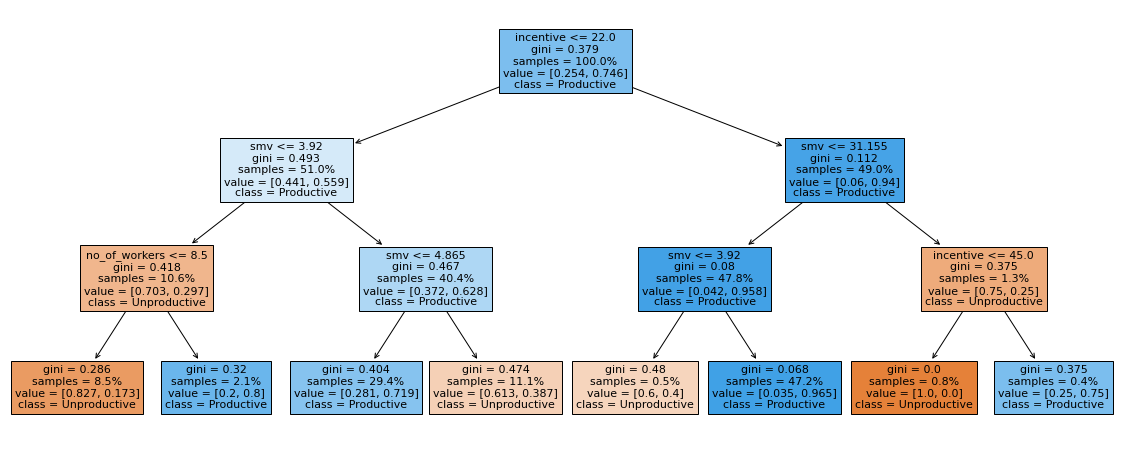

In [67]:
# Setting plot size

plt.figure(figsize = [20.0, 8.0])

# Plotting the tree with some specific parameters

_ = plot_tree(tree, 
              feature_names = X.columns, 
              class_names = ["Unproductive", "Productive"],
              filled = True, 
              rounded = False, 
              proportion = True, 
              fontsize = 11) 

We can see here that the most significant columns turned out to be "incentive" and "smv" (Standard Minute Value, or the allocated time for a task). All the splits, except one, used these columns to progressively divide the dataset into more homogeneous subsets.

It's important to remember that we pruned the tree when we instantiated the model. We restricted it to only feature a maximum depth of three levels to avoiding overfitting. If we hadn't, it's likely we would've seen other columns further dividing the dataset.

Let's use the model on a hypothetical observation which has an "incentive" of 24 and a "smv" of 5. You don't actually need any code to do this, as you can use the tree visually by following the branches to reach the leaf containing the prediction.

Since the "incentive" is greater than 22, 24 <= 22 evaluates to False at the root node and so we follow the path to the right (False splits always go to the right.) Since the "smv" is less than 31.155, 5 <= 31.155 evaluates to True at the child node below the root and so we follow the path to the left (True splits always go to the left.) In the final split before the leaf, since the "smv" is greater than 3.92, 5 <= 3.92 evaluates to False and so we follow the path to the right where we reach the final leaf node, which happens to feature a "Productive" class. 

To summarize, all this means that an observation with those characteristics would be predicted as "Productive" by the Decision Tree.

Feel free to use any observation you want by choosing alternate "incentive" and "smv" values to see where the Tree leads you!

- - -

Having plotted the Tree, we can continue exploring how effective the Tree is when using alternate metrics. Let's first start with a [Confusion Matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html), to keep it as reference:

In [68]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[ 35,  24],
       [ 13, 168]])

**[[True Negatives, False Positives],**

**[False Negatives, True Positives]]**

And now we can proceed to calculate the [Precision](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html), [Recall](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html) and [F1 Score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html).

In [69]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [70]:
print("Precision:", round(precision_score(y_test, y_pred), 2))

Precision: 0.88


$$\displaystyle\text{Precision} = \frac{\text{TP}}{(\text{TP + FP})}$$

In [71]:
print("Recall:", round(recall_score(y_test, y_pred), 2))

Recall: 0.93


$$\displaystyle\text{Recall} = \frac{\text{TP}}{(\text{TP + FN})}$$

In [72]:
print("F1 Score:", round(f1_score(y_test, y_pred), 2))

F1 Score: 0.9


$$\displaystyle\text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision + Recall}}$$

All these alternate metrics are even superior to Accuracy! Special mention for Recall, with a superb value of 0.93! 

This was the Accuracy, as a reminder:

In [73]:
print("Accuracy:", round(tree.score(X_test, y_test), 2))

Accuracy: 0.85


$$\displaystyle\text{Accuracy} = \frac{(\text{TP + TN})}{(\text{TP + TN + FP + FN})}$$

- - -

We also have another option to evaluate our tree: [Cross Validation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html). It divides the dataset into blocks/folds (the number of folds is determined by the "cv" parameter). Then it creates that many copies of the dataset where each copy will have a different segment of observations compared to the test set. 

The algorithm will then iterate on each copy and will output a list of the accuracy scores for all iterations.

This is a practical way to ensure that we didn't get the original accuracy score by pure chance by comparing it with several other possible results.

To improve readability in the calculations below, we have rounded the values to two decimals.

In [74]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree, X, y, cv = 10)

print("Cross Validation Accuracy Scores:", scores.round(2)) 

Cross Validation Accuracy Scores: [0.85 0.88 0.81 0.87 0.87 0.82 0.72 0.76 0.84 0.79]


In [75]:
print("Mean Cross Validation Score:", scores.mean().round(2))

Mean Cross Validation Score: 0.82


To finish with this section, let's now get Cross Validated values for the other evaluation metrics:

In [76]:
from sklearn.model_selection import cross_validate

multiple_cross_scores = cross_validate(
                             tree, 
                             X, y, cv = 10, 
                             scoring= ("precision", "recall", "f1") )

In [77]:
multiple_cross_scores["test_precision"].round(2)

array([0.86, 0.9 , 0.83, 0.85, 0.86, 0.87, 0.78, 0.85, 0.86, 0.87])

In [78]:
print("Mean Cross Validated Precision:", round(multiple_cross_scores["test_precision"].mean(), 2))

Mean Cross Validated Precision: 0.85


In [79]:
multiple_cross_scores["test_recall"].round(2)

array([0.96, 0.94, 0.94, 1.  , 0.99, 0.9 , 0.85, 0.82, 0.94, 0.84])

In [80]:
print("Mean Cross Validated F1:", round(multiple_cross_scores["test_recall"].mean(), 2))

Mean Cross Validated F1: 0.92


In [81]:
multiple_cross_scores["test_f1"].round(2)

array([0.91, 0.92, 0.88, 0.92, 0.92, 0.88, 0.82, 0.83, 0.9 , 0.86])

In [82]:
print("Mean Cross Validated F1:", round(multiple_cross_scores["test_f1"].mean(), 2))

Mean Cross Validated F1: 0.88


As we can see, after double checking with Cross Validate, we're still getting impressive metrics. This is excellent!

- - -

## Explaining the Tree

After confirming that our Tree is good enough, here we will explain to the company's leaders not only the insights that our model can provide, but also how Decision Trees themselves are to be interpreted. Imagine that the following text is being read in a conference room to an audience that has never seen a Decision Tree before.

In [83]:
tree.classes_ # We'll transform them to ["Unproductive", "Productive"]

array([False,  True])

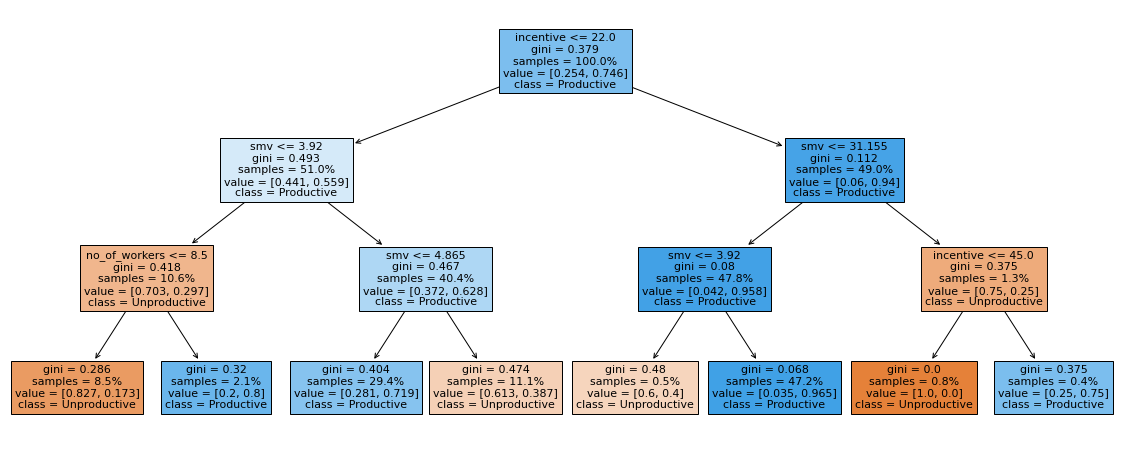

In [84]:
plt.figure(figsize = [20.0, 8.0])

_ = plot_tree(tree, 
              feature_names = X.columns, 
              class_names = ["Unproductive", "Productive"],
              filled = True, 
              rounded = False, 
              proportion = True, 
              fontsize = 11) 

"The graphic above was created using predictions produced by the algorithm we implemented — a Decision Tree. We chose this algorithm because, despite how intimidating the graphic appears to be, we'll have you interpreting the results in just a few minutes!

The graphic illustrates which aspects of the factory are best at predicting if a team will be productive or not. When we say aspects, we mean variables like the date, department, team number, etc. In our case, we discovered that the "incentive" and the "smv" variables were the ones with the greatest influence on the final prediction. To provide context, the "incentive" variable represents the amount of financial incentive offered to motivate a particular course of action. The "smv" (Standard Minute Value) variable represents the time allocated for a specific task.

How do we know that these two variables are the most predictive? We know this because of the information included in the square boxes in the graphic! For example, if we focus on the top part of each box, we will see that those two variables are the ones that appear most frequently. In fact, there is only a single exception in the lower left of the graphic where the variable "number of workers" appears at the top.

You may be wondering why the algorithm is called a Decision Tree. Well, you can think of the graphic as an inverted tree with the top box, called the "root", representing the most predictive feature and the boxes at the bottom, called the "leaves", which provide the predictions. These final boxes (leaves) are the ones that tell us whether a team in a specific department was productive or not. The prediction is shown in the "class" component at the bottom of the box. Keep in mind, even though all boxes feature a "class" component, we are only interested in the classes found in a leaf, not before.

**"But how do I know which path to take from the top box to the final ones?" you might ask. Good question! Basically, we need to use the thresholds associated with every variable at the top of every square box. We have to compare our inputs with those thresholds – starting from the root – until we reach the leaves at the bottom.** When we say "input" we are referring to the corresponding "incentives" and "smv" values for a particular team. We can obtain these values from any date we choose in the dataset or we can select the values ourselves to test hypothetical situations. This is excellent for us since it means we can use the Decision Tree to predict the outcome for future and/or hypothetical scenarios so long as we have their respective incentive and SMV values.

**We get it, that last part was a bit overwhelming, so to show you how all this works, let's use an example:** a fictional date where the "incentive" is 22 and "smv" is 4.44 to predict if a team will be productive or not under these conditions. Starting from the root, we see that our first comparison will be 22 <= 22 when we **substitute "incentive" for 22**.

So, is 22 less than or equal to 22? Yes! Since the assertion is True, we follow the arrow to the lower left box. This is a universal rule of Decision Trees: if the assertion is True, we continue to the left; otherwise, if it's False, we continue to the right. 

True = Left. False = Right.

Now we repeat the process for the rest of the boxes. We apply the same approach to the next box, which has the comparrison 4.44 <= 3.92 after **we substitute "smv" for 4.44**.

So, is 4.44 less than or equal to 3.92? No! Since the assertion is False, we follow the arrow to the lower right box. Again, **after substituting "smv" for 4.44** in that box, our final comparison is 4.44 <= 4.865.

So, is 4.44 less than or equal to 4.865? Yes! Since the assertion is True, we follow the arrow to the final lower left box, the leaf, which predicts the team will be "Productive". In other words, if we have a team with an "incentive" of 22 and a SMV of 4.44, it will be a productive team!

To summarize, the Decision Tree not only told us which variables have the strongest predictive power ("incentive" and "smv"), but it also allows us to make predictions using values of our own choosing. This is the power of Decision Trees! Any questions?"

- - -

## Using Random Forest

To confirm and validate the results from our Decision Tree model, let's use a Random Forest to compare results.

In [85]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(
                                oob_score = True,                                  
                                random_state = 24
                               )

forest.fit(X_train, y_train)

y_pred_forest = forest.predict(X_test)

print("Accuracy:", round(accuracy_score(y_test,y_pred_forest), 2))

Accuracy: 0.85


Let's also check the Out of Bag Score. As a reminder, when Random Forest generates training subsets for every individual Tree, it leaves out some observations of the dataset, and if we activate the OOB Score then those observations will be used as test subsets.

In [86]:
print("Out Of Bag Score:", round(forest.oob_score_, 2))

Out Of Bag Score: 0.83


Since the evaluation metrics of our Random Forest are similar to the scores of our Decision Tree, we can be confident about our results! 

Because of their tendency to overfit the data, it's always considered good practice to double-check Trees with a Random Forest.

# Final Thoughts

After completing a project, it is helpful to reflect on and highlight important aspects of the entire process to help solidify our learning.

- It's critically important to understand the data we're working with. Keeping the dataset description close at hand and referring to it often can help avoid confusion! Faulty assumptions early on can easily lead us to confusing results later on.

- As part of the Exploratory Data Analysis phase, always ensure the consistency and validity of the data. It's vital to identify any outliers, incorrect data, or any other error that can compromise the integrity of the data.

- Exercise good judgement when selecting the columns to train the model while making the necessary transformations (like a correct encoding) to ensure the model interprets the data correctly.

- Take all the time you need during the Data Cleaning phase to ensure there are no incorrect observations that could potentially foul the model during training. 

- When creating the Decision Tree algorithm, under no circumstances should we skip the evaluation phase! It can often provide us with clues about which hyperparameters to add or change when optimizing the model later on.

- It's good practice to double check our Trees with the Random Forest technique.

- Finally, if we're going to explain our findings to an audience, it pays to come prepared. While it's true that Decision Trees are easier to explain than other machine learning algorithms, it is still a machine learning algorithm and non-technical audiences will naturally be aprehensive!

You may have noticed that we made sure to comply with all these points throughout this project. This explains why we were able to create a highly accurate Decision Tree. While the steps that involved the *scikit-learn* library were of vital importance, we should never underestimate the value of all the preparation we did prior.